<a href="https://colab.research.google.com/github/AzizaBosaeed/Aziza_Portfolio/blob/main/Exploratory_Data_Analysis_(Amazon's_Top_50_Bestselling_Books).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project will show you the exploration of dataset (Amazon Top 50 Bestselling Books 2009 - 2019). I got this dataset on Kaggle website. The exploration will be in a systematic way, a task that statisticians call exploratory data analysis.

**The Questions that I am generated about the dataset are:**
*   Who is the author who got the highest rating from 2009 to 2019, and what is the book?
*   In each year, who is the author who got the highest rating, and what is the book?
*   Who is the author has written the most bestseller books from 2009 to 2019?
*   In each year, who is the author has written the most bestseller books?
*   Which book has the most reviews from 2009 to 2019?
*   In each year, which book has the most reviews?
*   Which genres become bestsellers more often?
*  In each year, which genres become bestsellers more often?


LET'S START :)

1- **Read dataset** of Amazon's Top 50 Bestselling Books. And displaying the first 5 rows of the dataset as a sample.

In [1]:
import pandas as pd
#read
dataset = pd.read_csv('/content/bestsellers with categories.csv')
#display
dataset.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


*   Shape of Dataset:



In [2]:
dataset.shape

(550, 7)

*   Columns of Dataset:

In [3]:
dataset.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

*   Data Type of Columns:

In [4]:
dataset.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

2- **Preparing The Dataset**
*   Change data type of Gener column.

In [5]:
dataset.Genre = dataset.Genre.astype('category')
dataset.Genre.dtypes

CategoricalDtype(categories=['Fiction', 'Non Fiction'], ordered=False)

*   Add lowercase column for each string column.

In [6]:
# Name column
dataset['Name_lowerC']=[x.lower() for x in dataset.Name]
# Author column
dataset['Author_lowerC']=[x.lower() for x in dataset.Author]
print(dataset.Name_lowerC[0],'\n',dataset.Author_lowerC[0])


10-day green smoothie cleanse 
 jj smith


*   Check if there is typing error (additional spaces) in the Name and Author columns.

In [7]:
!pip install requests fuzzywuzzy pandas pyjstat numpy plotly matplotlib seaborn geopy google folium pandas googlemaps


     |████████████████████████████████| 794 kB 8.6 MB/s 
  Created wheel for pyjstat: filename=pyjstat-2.2.1-py3-none-any.whl size=19427 sha256=be45795dfa1523682f4b5e9e6ef04ad133b7dc7d4b0cd212453d757888df352f
  Stored in directory: /root/.cache/pip/wheels/8a/f5/95/0d904a03e1b0f40c8d615e09ab6ab46c66e392391aaa02d407
  Created wheel for googlemaps: filename=googlemaps-4.5.3-py3-none-any.whl size=38479 sha256=2a03986860ad39c2e401ea8b23db9c6f6b257abc897189b12360cb5c41f287e0
  Stored in directory: /root/.cache/pip/wheels/fa/1a/1c/cc0b8a1652a3f06aea586b0e4714a81bafed830513969baf92
Successfully built pyjstat googlemaps


In [8]:
import requests
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

#build two lists of unique names and authors
names = pd.Series(dataset.Name_lowerC).sort_values().unique()
authors = dataset.Author_lowerC.sort_values().unique()


/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [9]:
#build a list of the most 3 similar spellings with names
for value in names:
    print(process.extract(value, names, limit=3, scorer=fuzz.token_sort_ratio))


[('10-day green smoothie cleanse', 100), ("giraffes can't dance", 49), ('the day the crayons quit', 49)]
[('11/22/63: a novel', 100), ('little bee: a novel', 47), ('the guardians: a novel', 43)]
[('12 rules for life: an antidote to chaos', 100), ("food rules: an eater's manual", 55), ('a dance with dragons (a song of ice and fire)', 49)]
[('1984 (signet classics)', 100), ('the confession: a novel', 43), ('10-day green smoothie cleanse', 41)]
[('5,000 awesome facts (about everything!) (national geographic kids)', 100), ('national geographic kids why?: over 1,111 answers to everything', 69), ('national geographic little kids first big book of why (national geographic little kids first big books)', 43)]
[('a dance with dragons (a song of ice and fire)', 100), ('a game of thrones / a clash of kings / a storm of swords / a feast of crows / a dance with dragons', 54), ('double down (diary of a wimpy kid #11)', 49)]
[('a game of thrones / a clash of kings / a storm of swords / a feast of crow

In [10]:
#build a list of the most 3 similar spellings with authors
for value in authors:
    print(process.extract(value, authors, limit=3, scorer=fuzz.token_sort_ratio))


[('abraham verghese', 100), ('deborah diesen', 53), ('george w. bush', 48)]
[('adam gasiewski', 100), ('amy shields', 56), ('adam mansbach', 52)]
[('adam mansbach', 100), ('adam gasiewski', 52), ('mitch albom', 50)]
[('adir levy', 100), ('dav pilkey', 53), ('doug lemov', 53)]
[('admiral william h. mcraven', 100), ('william davis', 58), ('emily winfield martin', 48)]
[('adult coloring book designs', 100), ('coloring books for adults', 77), ('blue star coloring', 53)]
[('alan moore', 100), ('eben alexander', 50), ('amor towles', 48)]
[('alex michaelides', 100), ('michael lewis', 69), ("madeleine l'engle", 55)]
[('alice schertle', 100), ('allie brosh', 56), ('elie wiesel', 56)]
[('allie brosh', 100), ('rob elliott', 55), ('sarah palin', 55)]
[('american psychiatric association', 100), ('american psychological association', 85), ('patrick lencioni', 50)]
[('american psychological association', 100), ('american psychiatric association', 85), ('christina baker kline', 40)]
[('amor towles', 1

There are additional spaces in these two authors name (r. r. martin, and j. k. rowling).

In [11]:
#replace george r. r. martin with george r.r. martin and j. k. rowling with j.k. rowling
dataset.Author_lowerC = dataset.Author_lowerC.replace('george r. r. martin', 'george r.r. martin')
dataset.Author_lowerC = dataset.Author_lowerC.replace('j. k. rowling', 'j.k. rowling')
      

*   Check for duplicate rows in dataset.

In [12]:
dataset.duplicated().any()

False

*   Find No. of unique values in each column

In [13]:
for col in dataset.columns:
    count_unique = dataset[col].nunique()
    print(col,':', count_unique)

Name : 351
Author : 248
User Rating : 14
Reviews : 346
Price : 40
Year : 11
Genre : 2
Name_lowerC : 350
Author_lowerC : 246


*   Find No. of Nones for each column to check the missing values in dataset.

In [14]:
for col in dataset.columns:
    count_missing = dataset[col].isnull().sum()
    print(col,':', count_missing)

Name : 0
Author : 0
User Rating : 0
Reviews : 0
Price : 0
Year : 0
Genre : 0
Name_lowerC : 0
Author_lowerC : 0


3- **Describe The Dataset**
*   Describe all numerical columns.

In [15]:
dataset.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


*   Find mode for each column. 

In [16]:
for col in dataset.columns:
    mode = dataset[col].mode()
    print(col,':', mode)

Name : 0    Publication Manual of the American Psychologic...
dtype: object
Author : 0    Jeff Kinney
dtype: object
User Rating : 0    4.8
dtype: float64
Reviews : 0    8580
dtype: int64
Price : 0    8
dtype: int64
Year : 0     2009
1     2010
2     2011
3     2012
4     2013
5     2014
6     2015
7     2016
8     2017
9     2018
10    2019
dtype: int64
Genre : 0    Non Fiction
Name: Genre, dtype: category
Categories (2, object): ['Fiction', 'Non Fiction']
Name_lowerC : 0    publication manual of the american psychologic...
1    the 5 love languages: the secret to love that ...
dtype: object
Author_lowerC : 0    jeff kinney
dtype: object


*   Find skewness and kurtosis measures for numerical columns.

In [17]:
from scipy.stats import kurtosis, skew
for col in dataset.columns:
  if(pd.api.types.is_numeric_dtype(dataset[col])):
    kurtosis_value = dataset[col].kurt()
    skew_value = dataset[col].skew()
    print(col,': skew=', skew_value,', kurtosis=', kurtosis_value)
    

User Rating : skew= -1.502125498034903 , kurtosis= 3.4653751477506565
Reviews : skew= 2.4215968315268785 , kurtosis= 8.809312639891214
Price : skew= 3.685056537836339 , kurtosis= 22.43352032785043
Year : skew= 0.0 , kurtosis= -1.220175009007326


*   Find correlation between variables (columns).

             User Rating   Reviews     Price      Year
User Rating     1.000000 -0.001729 -0.133086  0.242383
Reviews        -0.001729  1.000000 -0.109182  0.263560
Price          -0.133086 -0.109182  1.000000 -0.153979
Year            0.242383  0.263560 -0.153979  1.000000


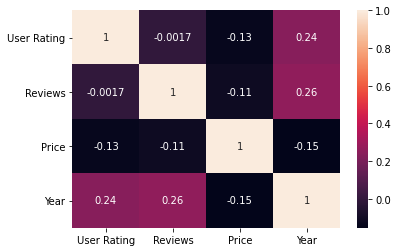

In [18]:
print(dataset.corr())
print('=========================================================')
import seaborn as sns
sns.heatmap(dataset.corr(), annot=True);

*   Plot correlation between Year and User Rating.

Text(0, 0.5, 'User Rating')

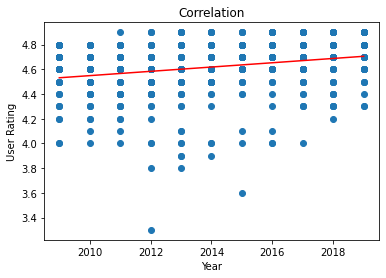

In [19]:
import matplotlib.pyplot as plt
import numpy as np
# adds the title
plt.title('Correlation')
  
# plot the data
plt.scatter(dataset['Year'], dataset['User Rating'])
  
# fits the best fitting line to the data
plt.plot(np.unique(dataset['Year']), 
         np.poly1d(np.polyfit(dataset['Year'], dataset['User Rating'], 1))
         (np.unique(dataset['Year'])), color='red')
  
# Labelling axes
plt.xlabel('Year')
plt.ylabel('User Rating')

*   Plot correlation between Year and Reviews.

Text(0, 0.5, 'Reviews')

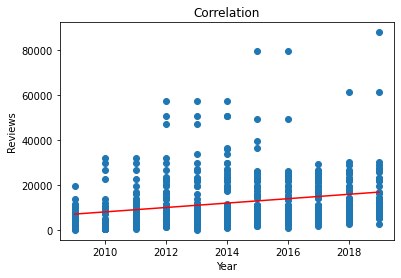

In [20]:
# adds the title
plt.title('Correlation')
  
# plot the data
plt.scatter(dataset['Year'], dataset['Reviews'])
  
# fits the best fitting line to the data
plt.plot(np.unique(dataset['Year']), 
         np.poly1d(np.polyfit(dataset['Year'], dataset['Reviews'], 1))
         (np.unique(dataset['Year'])), color='red')
  
# Labelling axes
plt.xlabel('Year')
plt.ylabel('Reviews')

4- **In the next, we will answer the following questions:**
*   In each year, who is the author who got the highest rating, and what is the book?
*   In each year, who is the author has written the most bestseller books?
*   In each year, which book has the most reviews?
*   In each year, which genres become bestsellers more often?


In [21]:
#Q1:

#build list for each year then find author who got highest rating and his book.
for year in dataset['Year'].sort_values().unique():
  dataset_year = dataset[dataset['Year'] == year]
  highest_rate_year = max(dataset_year['User Rating'])
  authors_highest_rating = dataset_year[dataset_year['User Rating'] == highest_rate_year]
  print(year,':')
  print('\n')
  print(authors_highest_rating[['Name', 'Author', 'User Rating']].to_string(index=False))
  print('\n')

2009 :


                                                        Name            Author  User Rating
               Diary of a Wimpy Kid: The Last Straw (Book 3)       Jeff Kinney          4.8
          Dog Days (Diary of a Wimpy Kid, Book 4) (Volume 4)       Jeff Kinney          4.8
                           Have a Little Faith: A True Story       Mitch Albom          4.8
               Liberty and Tyranny: A Conservative Manifesto     Mark R. Levin          4.8
                 Mastering the Art of French Cooking, Vol. 2       Julia Child          4.8
                                          The 5000 Year Leap  W. Cleon Skousen          4.8
                                                    The Help  Kathryn Stockett          4.8
 The Last Olympian (Percy Jackson and the Olympians, Book 5)      Rick Riordan          4.8
                                               The Love Dare  Stephen Kendrick          4.8
                                                    Watchmen        Ala

In [22]:
#Q2:

from collections import Counter
#count No. of books for each author in each year then find author who has written most bestseller books.
for year in dataset['Year'].sort_values().unique():  
  dataset_year = dataset[dataset['Year'] == year]
  count_books = pd.DataFrame(Counter(dataset_year.Author).items())
  # changing keys of DataFrame
  count_books['Author'] = count_books[0]
  del count_books[0]
  count_books['No. of books'] = count_books[1]
  del count_books[1]
  count_books_max = count_books[count_books['No. of books']== max(count_books['No. of books'])]
  print(year,':')
  print('\n')
  print(count_books_max.to_string(index=False))
  print('\n')

2009 :


          Author  No. of books
 Stephenie Meyer             6


2010 :


       Author  No. of books
 Rick Riordan             4


2011 :


          Author  No. of books
 Suzanne Collins             4


2012 :


          Author  No. of books
 Suzanne Collins             4
       E L James             4


2013 :


        Author  No. of books
 Veronica Roth             2
  Stephen King             2
   Rob Elliott             2


2014 :


     Author  No. of books
 John Green             3


2015 :


             Author  No. of books
 Blue Star Coloring             2
    Marjorie Sarnat             2
    Johanna Basford             2
         Harper Lee             2
        Rob Elliott             2
          Dr. Seuss             2


2016 :


       Author  No. of books
 J.K. Rowling             4


2017 :


    Author  No. of books
 Rupi Kaur             2


2018 :


     Author  No. of books
 Dav Pilkey             3


2019 :


     Author  No. of books
 Dav Pilkey       

In [23]:
#Q3:

#build list for each year then find the book that has the most reviews.
for year in dataset['Year'].sort_values().unique():
  dataset_year = dataset[dataset['Year'] == year]
  highest_reviews_year = max(dataset_year['Reviews'])
  books_highest_reviews = dataset_year[dataset_year['Reviews'] == highest_reviews_year]
  print(year,':')
  print('\n')
  print(books_highest_reviews[['Name','Reviews']].to_string(index=False))
  print('\n')


2009 :


                                        Name  Reviews
 The Shack: Where Tragedy Confronts Eternity    19720


2010 :


             Name  Reviews
 The Hunger Games    32122


2011 :


                      Name  Reviews
 The Hunger Games (Book 1)    32122


2012 :


      Name  Reviews
 Gone Girl    57271


2013 :


      Name  Reviews
 Gone Girl    57271


2014 :


      Name  Reviews
 Gone Girl    57271


2015 :


                  Name  Reviews
 The Girl on the Train    79446


2016 :


                  Name  Reviews
 The Girl on the Train    79446


2017 :


                Name  Reviews
 The Handmaid's Tale    29442


2018 :


     Name  Reviews
 Becoming    61133


2019 :


                    Name  Reviews
 Where the Crawdads Sing    87841




In [24]:
#Q4:

from collections import Counter
#count No. of books for each genre in each year then find which genres become bestsellers more often?
for year in dataset['Year'].sort_values().unique():  
  dataset_year = dataset[dataset['Year'] == year]
  count_books = pd.DataFrame(Counter(dataset_year.Genre).items())
  # changing keys of DataFrame
  count_books['Genre'] = count_books[0]
  del count_books[0]
  count_books['No. of books'] = count_books[1]
  del count_books[1]
  count_books_max = count_books[count_books['No. of books']== max(count_books['No. of books'])]
  print(year,':')
  print('\n')
  print(count_books_max.to_string(index=False))
  print('\n')

2009 :


       Genre  No. of books
 Non Fiction            26


2010 :


       Genre  No. of books
 Non Fiction            30


2011 :


       Genre  No. of books
 Non Fiction            29


2012 :


       Genre  No. of books
 Non Fiction            29


2013 :


       Genre  No. of books
 Non Fiction            26


2014 :


   Genre  No. of books
 Fiction            29


2015 :


       Genre  No. of books
 Non Fiction            33


2016 :


       Genre  No. of books
 Non Fiction            31


2017 :


       Genre  No. of books
 Non Fiction            26


2018 :


       Genre  No. of books
 Non Fiction            29


2019 :


       Genre  No. of books
 Non Fiction            30




5- **In the next, we will answer the following questions:**
*   Who is the author who got the highest rating from 2009 to 2019, and what is the book?
*   Who is the author has written the most bestseller books from 2009 to 2019?
*   Which book has the most reviews from 2009 to 2019?
*   Which genres become bestsellers more often?

*   Delete Duplicates





In [25]:
#take copy of dataset
dataset_copy = dataset.copy()
#delete Year and Price columns
del dataset_copy['Year']
del dataset_copy['Price']
dataset_copy.head()

,Name,Author,User Rating,Reviews,Genre,Name_lowerC,Author_lowerC
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,Non Fiction,10-day green smoothie cleanse,jj smith
1,11/22/63: A Novel,Stephen King,4.6,2052,Fiction,11/22/63: a novel,stephen king
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,Non Fiction,12 rules for life: an antidote to chaos,jordan b. peterson
3,1984 (Signet Classics),George Orwell,4.7,21424,Fiction,1984 (signet classics),george orwell
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,Non Fiction,"5,000 awesome facts (about everything!) (natio...",national geographic kids


In [26]:
#delete dublicates
dataset_copy = dataset_copy.drop_duplicates(keep='first')
#check if there are any duplicate books 
dataset_copy[dataset_copy.duplicated(keep=False, subset=['Name_lowerC'])]

,Name,Author,User Rating,Reviews,Genre,Name_lowerC,Author_lowerC
320,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,Non Fiction,the 5 love languages: the secret to love that ...,gary chapman
325,The 5 Love Languages: The Secret to Love that ...,Gary Chapman,4.8,25554,Non Fiction,the 5 love languages: the secret to love that ...,gary chapman
331,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.6,9325,Non Fiction,the 7 habits of highly effective people: power...,stephen r. covey
335,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.7,4725,Non Fiction,the 7 habits of highly effective people: power...,stephen r. covey


In [56]:
#for delete duplicate books, we need build two copies on for highest rating and another one for highest reviews.
dataset_copy_highest_rating = dataset_copy.copy()
dataset_copy_highest_reviews = dataset_copy.copy()

In [57]:
#delete two rowes from dataset_copy_highest_rating (320 and 331) 
dataset_copy_highest_rating = dataset_copy_highest_rating.drop(320)
dataset_copy_highest_rating = dataset_copy_highest_rating.drop(331)
#delete two rowes from dataset_copy_highest_reviews (320 and 335)
dataset_copy_highest_reviews = dataset_copy_highest_reviews.drop(320)
dataset_copy_highest_reviews = dataset_copy_highest_reviews.drop(335)


,Name,Author,User Rating,Reviews,Genre,Name_lowerC,Author_lowerC


In [60]:
#Q1:

#find author who got highest rating and his book.
highest_rate_year = max(dataset_copy_highest_rating['User Rating'])
authors_highest_rating = dataset_copy_highest_rating[dataset_copy_highest_rating['User Rating'] == highest_rate_year]
print(authors_highest_rating[['Name', 'Author', 'User Rating']].to_string(index=False))


                                                                                                                    Name                 Author  User Rating
                                                                                Brown Bear, Brown Bear, What Do You See?        Bill Martin Jr.          4.9
                                                Dog Man and Cat Kid: From the Creator of Captain Underpants (Dog Man #4)             Dav Pilkey          4.9
                                     Dog Man: A Tale of Two Kitties: From the Creator of Captain Underpants (Dog Man #3)             Dav Pilkey          4.9
                                         Dog Man: Brawl of the Wild: From the Creator of Captain Underpants (Dog Man #6)             Dav Pilkey          4.9
                                                  Dog Man: Fetch-22: From the Creator of Captain Underpants (Dog Man #8)             Dav Pilkey          4.9
                                   Dog Man: For Whom the B

In [61]:
#Q2:

from collections import Counter
#count No. of books for each author then find author who has written most bestseller books.
count_books = pd.DataFrame(Counter(dataset_copy_highest_reviews.Author).items())
# changing keys of DataFrame
count_books['Author'] = count_books[0]
del count_books[0]
count_books['No. of books'] = count_books[1]
del count_books[1]
#find author who has written most bestseller books.
count_books_max = count_books[count_books['No. of books']== max(count_books['No. of books'])]
print(count_books_max.to_string(index=False))


      Author  No. of books
 Jeff Kinney            12


In [62]:
#Q3:

#find the book that has the most reviews.
highest_reviews_year = max(dataset_copy_highest_reviews['Reviews'])
books_highest_reviews = dataset_copy_highest_reviews[dataset_copy_highest_reviews['Reviews'] == highest_reviews_year]
print(books_highest_reviews[['Name','Reviews']].to_string(index=False))


                    Name  Reviews
 Where the Crawdads Sing    87841


In [64]:
#Q4:

from collections import Counter
#count No. of books for each genre then find which genres become bestsellers more often?
count_books = pd.DataFrame(Counter(dataset_copy_highest_reviews.Genre).items())
# changing keys of DataFrame
count_books['Genre'] = count_books[0]
del count_books[0]
count_books['No. of books'] = count_books[1]
del count_books[1]
#find which genres become bestsellers more often?
count_books_max = count_books[count_books['No. of books']== max(count_books['No. of books'])]
print(count_books_max.to_string(index=False))


       Genre  No. of books
 Non Fiction           190


**The End...**